# Análise da Opinião Pública e Crítica da Cerimônia do Oscar neste Século

## Integrantes:

### João Victor Soares Silva | Mat.: 20210027300
### Marília Gabriela Toscano da Silva | Mat.: 20210067065
### Matheus Victor Alves Braga Maciel | Mat.: 20200025508

# Introdução

    A cerimônia do Oscar é considerada a maior premiação do cinema mundial. Com quase um século desde a sua fundação, ela conseguiu se tornar e se mantém como um dos maiores eventos do ano na cultura popular e, por esse círculo midiático que a rodeia, não é incomum nos encontrarmos com distintas opiniões acerca das nomeações e dos prêmios entregues.
    Nesse contexto, então, o nosso grupo elaborou este trabalho para estudar as relações existentes entre as opiniões críticas e públicas em alguns dos maiores sites de avaliações de filmes atuais, com as da academia.

## Objetivos

### Objetivos Gerais
* Estudar o perfil dos filmes reconhecidos pela academia neste século;
* Explorar os datasets e encontrar correlações entre os dados dos sites de avaliações e os dados da premiação.

### Objetivos Específicos
* Traçar um perfil contendo as características mais observadas dos indicados, em distintos parâmetros;
* Filtrar os indicados de acordo com suas recepções nos sites de avaliações estudados e traçar um perfil dos melhores. Após, comparar o perfil com o primeiro objetivo;
* Encontrar qual o indicador mais relevante para a vitória na categoria de Melhor Filme na premiação entre os sites estudados. 

# Dados Usados

Bibliotecas utilizadas:

As seguintes bibliotecas foram utilizadas como ferramentas para explorar os dados e auxiliar na visualização durante o trabalho:

* Pandas;
* Numpy;
* MatPlotLib;
* Seaborn;
* SKLearn.

In [184]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Datasets utilizados:

Dataset do Oscar: Engloba dados desde 1927 sobre a premiação. A seguir, uma lista das colunas que utilizamos do dataset e o que seus dados representam:
* year = Ano de lançamento do filme;
* movie = Nome;
* certificate = Classificação indicativa (padrão estadunidense);
* duration = Tempo de duração, em minutos;
* genre = Gêneros;
* rate = Avaliação dos usuários do site IMDb (Internet Movie Database), de 0 a 10;
* metascore = Avaliação dos críticos no site Metacritic, de 0 a 100;
* Oscar_Best_Picture_won = Indica se o filme ganhou ou não a categoria de "Melhor Filme" na premiação, booleano;

Dataset do Rotten Tomatoes: Contém informações técnicas sobre os filmes avaliados no site Rotten Tomatoes, ele possui +17 mil filmes e sua útlima atualização foi em 2020. A seguir, uma das colunas que utilizamos do dataset e o que elas representam:
* movie_title: Título do filme;
* tomatometer_status: Classificação própria do Rotten Tomatoes para os críticos, suas categorias consistem em:
    * Rotten: quando menos de 60% das críticas ao filme são positivas.
    * Fresh: quando ao menos 60% das críticas ao filme são positivas.
    * Certified-Fresh: distinção especial dada aos filmes que possuem:
        - Uma nota no Tomatometer consistente igual ou superior a 75%;
        - Ao menos cinco críticas dos top críticos;
        - Um mínimo de 80 críticas para filmes lançados em grande escala;
        - Um mínimo de 40 críticas para filmes lançados de forma limitada;
* tomatometer_rating: Nota dos críticos do site;
* audience_status: Classificação própria do Rotten Tomatoes para os usuários, suas categorias consistem em:
    * Spilled: quando menos de 60% das críticas ao filme possue uma avaliação mínima de 3.5/5.0 estrelas.
    * Upright: quando ao menos 60% das críticas ao filme possue uma avaliação mínima de 3.5/5.0 estrelas;
* audience_rating: Nota dos usuários do site.

Importando:

In [185]:
#Dataframe dos indicados ao Oscar:

oscar = pd.read_csv('BigML_Dataset_5f50a62c2fb31c516d000176.csv')
oscar.head(1)

,year,movie,movie_id,certificate,duration,genre,rate,metascore,synopsis,votes,...,New_York_Film_Critics_Circle_nominated,New_York_Film_Critics_Circle_nominated_categories,Los_Angeles_Film_Critics_Association_won,Los_Angeles_Film_Critics_Association_won_categories,Los_Angeles_Film_Critics_Association_nominated,Los_Angeles_Film_Critics_Association_nominated_categories,release_date.year,release_date.month,release_date.day-of-month,release_date.day-of-week
0,2001,Kate & Leopold,tt0035423,PG-13,118,Comedy|Fantasy|Romance,6.4,44.0,An English Duke from 1876 is inadvertedly drag...,66660,...,0,NaN,0,NaN,0,NaN,2001.0,12.0,25.0,2.0


In [186]:
#Dataframe dos filmes no site Rotten Tomatoes:

rotten = pd.read_csv('rotten_tomatoes_movies.csv')
rotten.head(1)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76


# Pré-Processamento

A seguir, iremos manipular os dataframes usados como base na pesquisa de forma que seja gerado um outro que contenha apenas as informações que serão relevantes para a pesquisa.
Começando pelo dataframe 'oscar':

* O dataframe possui muitas colunas, para tornar o processamento dos dados mais ágil, iremos limpá-lo e deixar apenas as colunas que serão relevantes à pesquisa:

In [187]:
oscar = oscar[['year', 'movie', 'certificate', 'duration', 'genre', 'rate', 'metascore', 'Oscar_Best_Picture_won']]
oscar.head(1)

,year,movie,certificate,duration,genre,rate,metascore,Oscar_Best_Picture_won
0,2001,Kate & Leopold,PG-13,118,Comedy|Fantasy|Romance,6.4,44.0,No


* As linhas contendo valores nulos (NaN) foram descartadas, pois não é interessante algumas análises utilizarem uma amostra de dados maior que outras:

In [188]:
oscar = oscar.dropna()

* Os filmes que concorreram a edições prévias a 2001 foram descartados, visto que nosso corte temporal é este século:

In [189]:
oscar = oscar [(oscar.year > 2000)]
oscar.reset_index(inplace = True, drop = True)
oscar.head(1)

,year,movie,certificate,duration,genre,rate,metascore,Oscar_Best_Picture_won
0,2001,Kate & Leopold,PG-13,118,Comedy|Fantasy|Romance,6.4,44.0,No


Agora vamos manipular o dataframe 'rotten':

* Aqui, vamos filtrar as colunas que utilizaremos:

In [190]:
rotten = rotten[['movie_title', 'tomatometer_status', 'tomatometer_rating', 'audience_status', 'audience_rating']]
rotten.head(1)

,movie_title,tomatometer_status,tomatometer_rating,audience_status,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,Rotten,49.0,Spilled,53.0


2. Por fim, vamos retirar as linhas que possuem valores vazios (NaN):

In [191]:
rotten = rotten.dropna()

Com isso feito, agora, vamos associar os filmes de um dataframe ao outro, através dos seus nomes:

In [192]:
#Renomeando a coluna de nomes para que fiquem idênticas:
rotten.rename(columns = {'movie_title': 'movie'}, inplace = True)

#Juntando os dataframes:
df_final = pd.merge(oscar, rotten, how = 'inner', on = 'movie')
df_final.head(1)

,year,movie,certificate,duration,genre,rate,metascore,Oscar_Best_Picture_won,tomatometer_status,tomatometer_rating,audience_status,audience_rating
0,2001,Kate & Leopold,PG-13,118,Comedy|Fantasy|Romance,6.4,44.0,No,Rotten,50.0,Upright,62.0


Para evitar distorção nos dados, vamos verificar quantos filmes foram perdidos nessa associação entre os dataframes:

In [193]:
# Verificando quantas linhas foram perdidas no merge:
print(f'Número de linhas do dataframe final: {df_final.shape[0]}')
print(f'Número de linhas perdidas no merge: {oscar.shape[0] - df_final.shape[0]}')
print(f'Percentual de perda de dados: {((oscar.shape[0] - df_final.shape[0]) * 100) / df_final.shape[0]:.2f}%')

Número de linhas do dataframe final: 1062
Número de linhas perdidas no merge: 27
Percentual de perda de dados: 2.54%


O percentual de perda não foi muito grande, com isso, podemos continuar nossos estudos e, assim, acabamos nosso pré-processamento.

# Quais as características mais frequentes entre os filmes indicados à premiação?

## Classificação

Para responder essa pergunta, iremos analisar o dataframe que produzimos no último passo e encontrar quais os dados mais comuns nas seguintes colunas:
* 'certificate';
* 'duration';
* 'genre';
* 'rate';
* 'metascore';
* 'tomatometer_status';
* 'tomatometer_rating';
* 'audience_status';
* 'audience_rating'.

### Classificação Indicativa

[Text(0.5, 0, 'Certificados'), Text(0, 0.5, 'Nº de Filmes')]

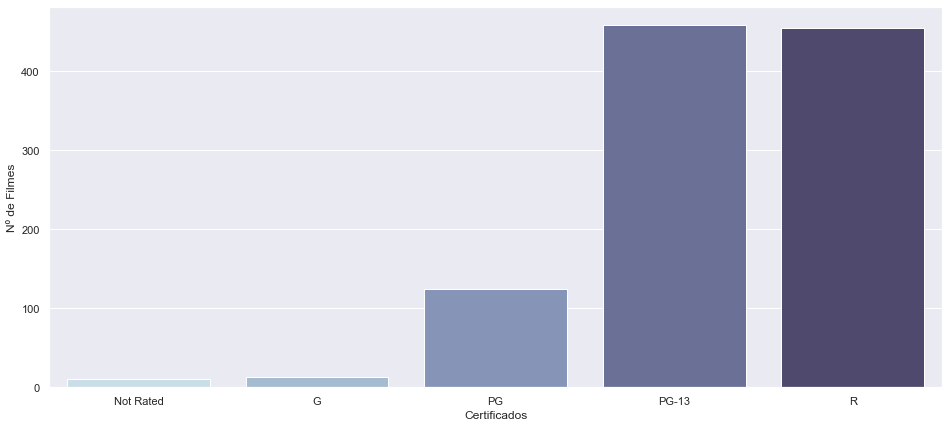

In [194]:
#Contando a frequência de cada classificação:
count_cert = df_final.groupby(['certificate']).size()

#Juntando classificações iguais, mas com termos distintos:
#Unrated e Not Rated:
count_cert['Not Rated'] += count_cert['Unrated']
del(count_cert['Unrated'])

#TV-MA e R:
count_cert['R'] += count_cert['TV-MA']
del(count_cert['TV-MA'])

#Organizando:
count_cert = count_cert.reindex(index = ['Not Rated', 'G', 'PG', 'PG-13', 'R'])

#Visualização:
sns.set_theme(font_scale = 1.0, palette = 'ch:s=.25,rot=-.25')
f, axs = plt.subplots(figsize = (16, 7))
graph_cert = sns.barplot(x = count_cert.index, y = count_cert.values)
graph_cert.set(xlabel = 'Certificados', ylabel = 'Nº de Filmes')

Podemos observar aqui que, quanto maior a classificação indicativa, maior a frequência de indicados, com as duas últimas colunas virtualmente empatadas. Classificando, temos:

In [195]:
count_cert = count_cert.sort_values(ascending = False)
pd.DataFrame(count_cert, columns = ['movies'])

,movies
certificate,
PG-13,459
R,455
PG,125
G,13
Not Rated,10


### Duração

* Decidimos categorizar as durações de acordo com um intervalo, para agrupar as que têm durações semelhantes, assim:

[Text(0.5, 0, 'Duração'), Text(0, 0.5, 'Nº de Filmes')]

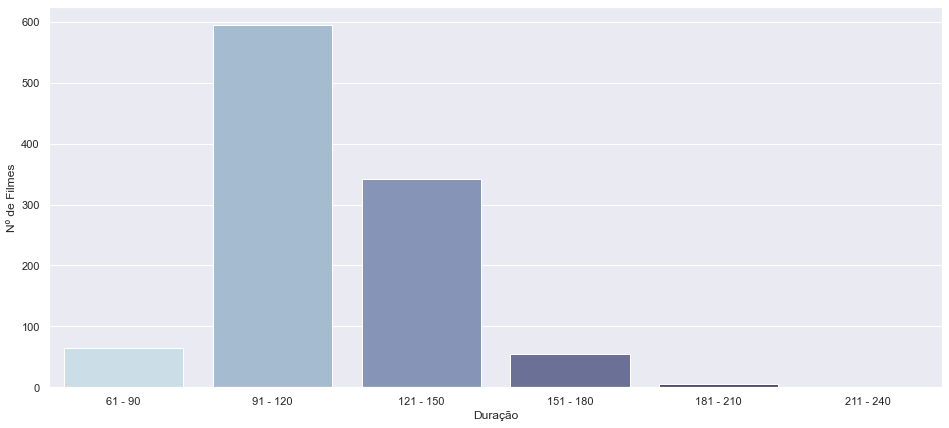

In [196]:
#A função a seguir devolve o intervalo em que o número está. A generalizamos para uso futuro:
def n_break (n, start, end, mod, scale_cem = True):
    break_start = start
    break_end = end

    if scale_cem:
        while True:
            if (break_start <= n <= break_end):
                return f'{break_start} - {break_end}'
            else:
                break_start = break_end + 1
                break_end += mod
    
    else:
        while True:
            if (break_start <= n <= break_end):
                return f'{break_start} - {break_end}'
            else:
                break_start = break_end + 0.1
                break_end += mod

#Adicionando a coluna duration_break dos intervalos das durações:
count_dur = df_final
count_dur['duration_break'] = count_dur['duration'].apply(n_break, args = (1, 30, 30))

#Contando a frequência de cada intervalo:
count_dur = count_dur.groupby(['duration_break']).size()

#Organizando:
count_dur = count_dur.reindex(index = ['61 - 90', '91 - 120', '121 - 150', '151 - 180', '181 - 210', '211 - 240'])

#Visualização:
f, axs = plt.subplots(figsize = (16, 7))
graph_dur = sns.barplot(x = count_dur.index, y = count_dur.values)
graph_dur.set(xlabel = 'Duração', ylabel = 'Nº de Filmes')


Os filmes entre 1:30 e 2:00 apareceram aqui com uma grande margem acima dos outros. Filmes maiores são mais escassoz, naturalmente, possuem poucos filmes. A seguir, a classificação:

In [197]:
count_dur = count_dur.sort_values(ascending = False)

pd.DataFrame(count_dur, columns = ['movies'])

,movies
duration_break,
91 - 120,595
121 - 150,342
61 - 90,64
151 - 180,54
181 - 210,6
211 - 240,1


### Gênero

In [198]:
#Função para criar o dicionário com os gêneros e suas ocorrências:
def str_count (str, dict):
    dicio = dict

    if ('|' in str):
        str = str.split('|')

        for i in range (len(str)):
            if (str[i] in dicio.keys()):
                dicio[str[i]] += 1
        
            else:
                dicio[str[i]] = 1

    else:
        if (str in dicio.keys()):
            dicio[str] += 1
        
        else:
            dicio[str] = 1
    
    return dicio

#Criando o dicionário:
dicio_gen = {}

for i in range(len(df_final.index)):
    dicio_gen = str_count(df_final['genre'].iloc[i], dicio_gen)

count_gen = pd.DataFrame(list(dicio_gen.items()), columns = ['genre', 'movies'])

#Juntando gêneros iguais, mas com termos distintos:
#count_gen['History'] += count_gen['Histor']
#del(count_gen['Unrated'])
#count_gen.loc[count_gen['genre'] == 'History', ['movies']] += count_gen.loc[count_gen['genre'] == 'Histor', ['movies']]

#Organizando e visualizando:
count_gen = count_gen.sort_values(['movies'], ascending = False)
count_gen.reset_index(inplace = True, drop = True)
count_gen


,genre,movies
0,Drama,599
1,Adventure,297
2,Action,290
3,Comedy,281
4,Romance,186
5,Crime,165
6,Thriller,142
7,Sci-Fi,116
8,Biography,113
9,Fantasy,111


### Nota do Usuários - IMDb

* Assim como nas durações, agruparemos em intervalos as notas semelhantes:

[Text(0.5, 0, 'Notas no IMDb'), Text(0, 0.5, 'Nº de filmes')]

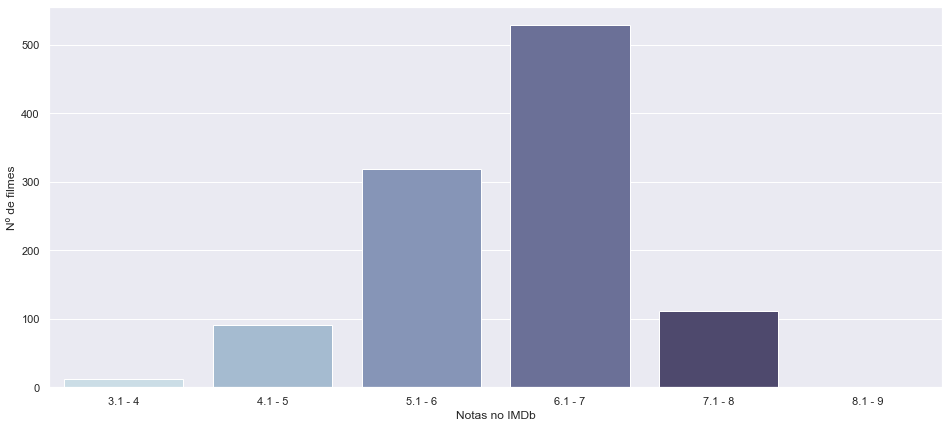

In [199]:
#A função a seguir servirá para corrigir os valores das Notas do IMBd:
def inteirar (n):
    return int(n)

#Adicionando a coluna rate_break dos intervalos das notas:
count_rate = df_final
count_rate = count_rate['rate'].apply(inteirar)
count_rate['rate_break'] = count_rate.apply(n_break, args = (0, 1, 1, False))

#Contando a frequência de cada intervalo:
count_rate = count_rate.groupby(['rate_break']).size()

#Visualização:
f, axs = plt.subplots(figsize = (16, 7))
graph_rate = sns.barplot(x = count_rate.index, y = count_rate.values)
graph_rate.set(xlabel = 'Notas no IMDb', ylabel = 'Nº de filmes')


Em ordem:

In [200]:
count_rate = count_rate.sort_values(ascending = False)
count_rate

rate
6.1 - 7    529
5.1 - 6    318
7.1 - 8    111
4.1 - 5     91
3.1 - 4     12
8.1 - 9      1
Name: rate, dtype: int64

### Metascore

[Text(0.5, 0, 'Metascore'), Text(0, 0.5, 'Nº de filmes')]

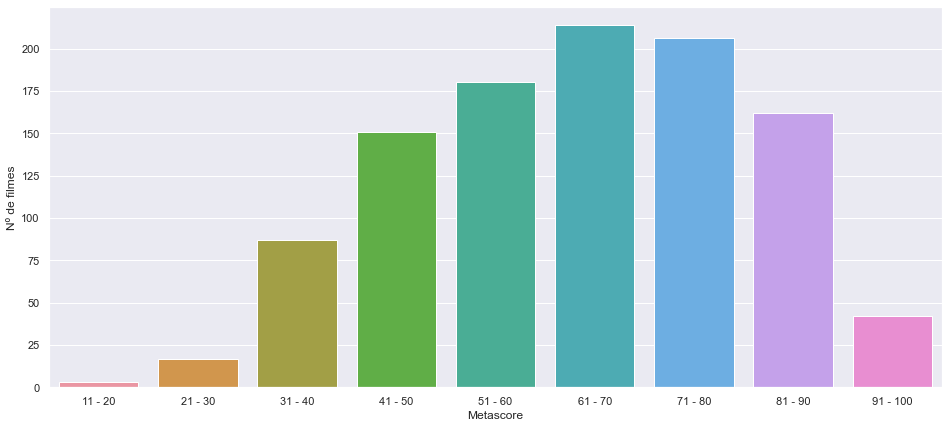

In [201]:
#Adicionando a coluna meta_break dos intervalos das notas:
count_meta = df_final
count_meta['meta_break'] = count_meta['metascore'].apply(n_break, args = (0, 10, 10))

#Contando a frequência de cada intervalo:
count_meta = count_meta.groupby(['meta_break']).size()

#Visualização:
f, axs = plt.subplots(figsize = (16, 7))
graph_meta = sns.barplot(x = count_meta.index, y = count_meta.values)
graph_meta.set(xlabel = 'Metascore', ylabel = 'Nº de filmes')

Em ordem:

In [202]:
count_meta = count_meta.sort_values(ascending = False)
pd.DataFrame(count_meta, columns = ['movies'])

,movies
meta_break,
61 - 70,214
71 - 80,206
51 - 60,180
81 - 90,162
41 - 50,151
31 - 40,87
91 - 100,42
21 - 30,17
11 - 20,3


### Status do Tomatometer

[Text(0.5, 0, 'Status'), Text(0, 0.5, 'Nº de filmes')]

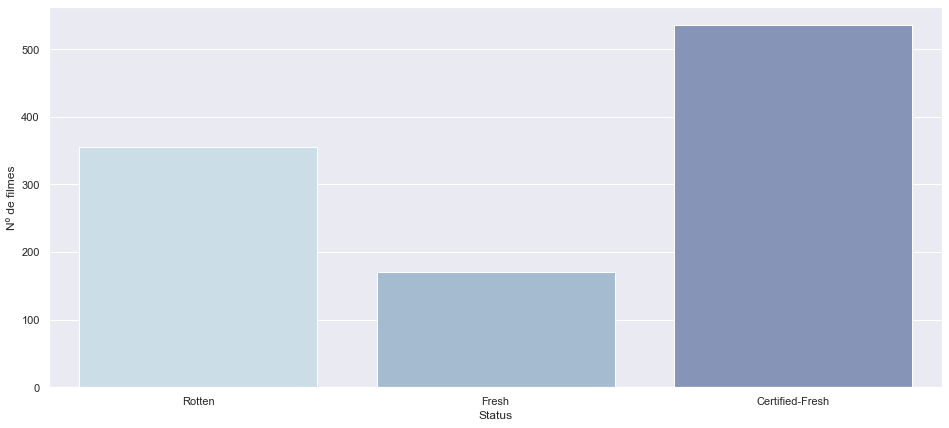

In [203]:
#Contando a frequência de cada status:
count_tomatometer = df_final.groupby(['tomatometer_status']).size()

count_tomatometer

#Organizando:
count_tomatometer = count_tomatometer.reindex(index = ['Rotten', 'Fresh', 'Certified-Fresh'])

#Visualização:
f, axs = plt.subplots(figsize = (16, 7))
graph_tomatometer = sns.barplot(x = count_tomatometer.index, y = count_tomatometer.values)
graph_tomatometer.set(xlabel = 'Status', ylabel = 'Nº de filmes')

Em ordem:

In [204]:
count_tomatometer = count_tomatometer.sort_values(ascending = False)
pd.DataFrame(count_tomatometer, columns = ['movies'])

,movies
tomatometer_status,
Certified-Fresh,536
Rotten,356
Fresh,170


### Tomatometer

[Text(0.5, 0, 'Notas'), Text(0, 0.5, 'Nº de filmes')]

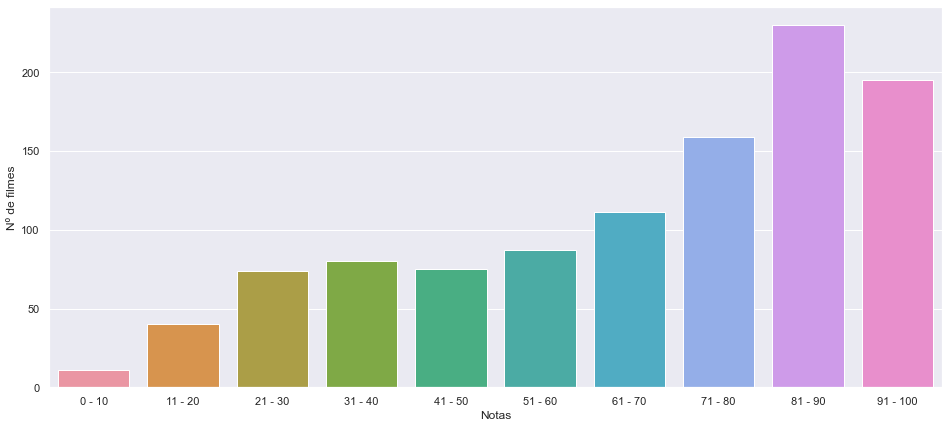

In [205]:
#Adicionando a coluna tomatometer_break dos intervalos das notas:
count_tomatometer_rating = df_final
count_tomatometer_rating['tomatometer_break'] = count_tomatometer_rating['tomatometer_rating'].apply(n_break, args = (0, 10, 10))

#Contando a frequência de cada intervalo:
count_tomatometer_rating = count_tomatometer_rating.groupby(['tomatometer_break']).size()

#Visualização:
f, axs = plt.subplots(figsize = (16, 7))
graph_tomatometer_rating = sns.barplot(x = count_tomatometer_rating.index, y = count_tomatometer_rating.values)
graph_tomatometer_rating.set(xlabel = 'Notas', ylabel = 'Nº de filmes')

Em ordem:

In [206]:
count_tomatometer_rating = count_tomatometer_rating.sort_values(ascending = False)
pd.DataFrame(count_tomatometer_rating, columns = ['movies'])

,movies
tomatometer_break,
81 - 90,230
91 - 100,195
71 - 80,159
61 - 70,111
51 - 60,87
31 - 40,80
41 - 50,75
21 - 30,74
11 - 20,40


### O Status da Audiência do RT

[Text(0.5, 0, 'Status'), Text(0, 0.5, 'Nº de filmes')]

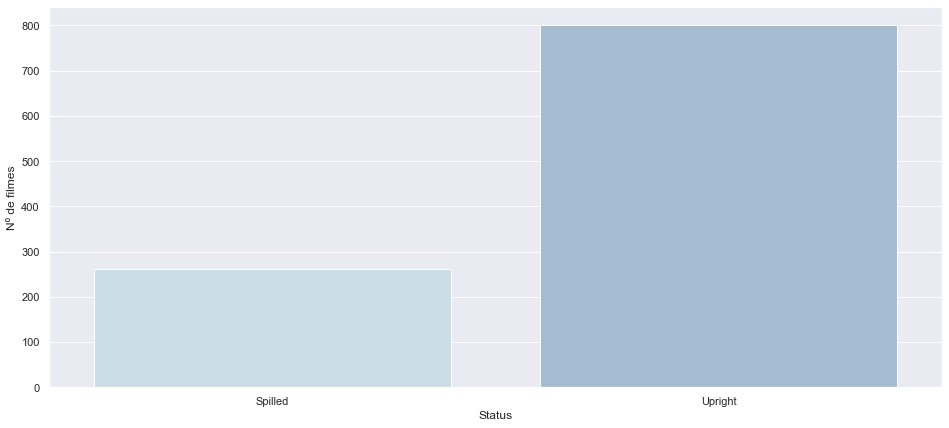

In [207]:
#Contando a frequência de cada status:
count_audience = df_final.groupby(['audience_status']).size()

#Visualização:
f, axs = plt.subplots(figsize = (16, 7))
graph_audience = sns.barplot(x = count_audience.index, y = count_audience.values)
graph_audience.set(xlabel = 'Status', ylabel = 'Nº de filmes')

Em ordem:

In [208]:
count_audience = count_audience.sort_values(ascending = False)
pd.DataFrame(count_audience, columns = ['movies'])

,movies
audience_status,
Upright,801
Spilled,261


### Nota do Usuários - RT

[Text(0.5, 0, 'Notas'), Text(0, 0.5, 'Nº de filmes')]

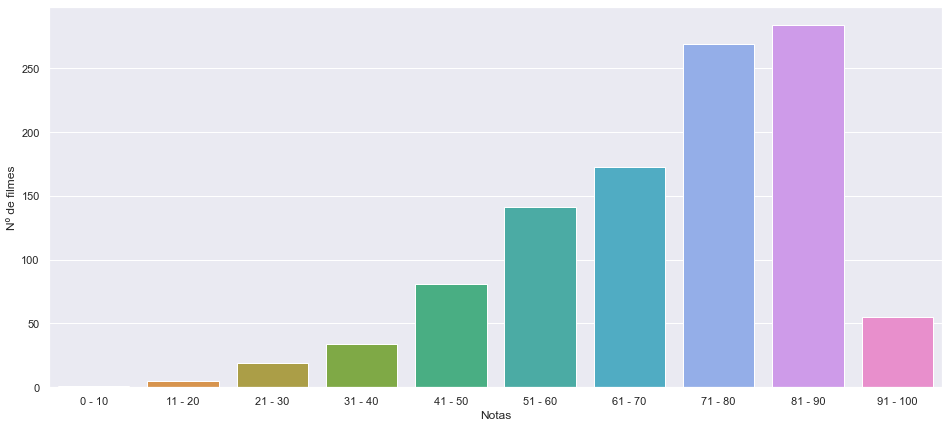

In [230]:
#Adicionando a coluna audience_break dos intervalos das notas:
count_audience_rating = df_final
count_audience_rating['audience_break'] = count_audience_rating['audience_rating'].apply(n_break, args = (0, 10, 10))

#Contando a frequência de cada intervalo:
count_audience_rating = count_audience_rating.groupby(['audience_break']).size()

#Visualização:
f, axs = plt.subplots(figsize = (16, 7))
graph_audience = sns.barplot(x = count_audience_rating.index, y = count_audience_rating.values)
graph_audience.set(xlabel = 'Notas', ylabel = 'Nº de filmes')

Em ordem:

In [210]:
count_audience_rating = count_audience_rating.sort_values(ascending = False)
pd.DataFrame(count_audience_rating, columns = ['movies'])

,movies
audience_break,
81 - 90,284
71 - 80,269
61 - 70,173
51 - 60,141
41 - 50,81
91 - 100,55
31 - 40,34
21 - 30,19
11 - 20,5


## Respondendo a Pergunta

Após essas análises, vamos sumarizar tudo:

### Sumário por maiores dados:

In [275]:
dicio = {'PG-13': [459], 'Dur: 91 - 120 min': [595], 'Drama': [599], 'IMDb: 6.1 - 7': [529], 'Meta: 61 - 70': [214],
'Certified-Fresh': [536], 'Tomatometer: 81 - 90': [230], 'Upright': [801], 'Aud_RT: 81 - 90': [284]}

result = pd.DataFrame(data = dicio)
result

,PG-13,Dur: 91 - 120 min,Drama,IMDb: 6.1 - 7,Meta: 61 - 70,Certified-Fresh,Tomatometer: 81 - 90,Upright,Aud_RT: 81 - 90
0,459,595,599,529,214,536,230,801,284


### Sumário por percentuais em cada categoria:

In [276]:
def percen_df (n, o = df_final.shape[0]):
    return f'{(n/o) * 100:.2f}%'

dicio_percen = {'PG-13': [percen_df(459)], 'Dur: 91 - 120 min': [percen_df(595)], 'Drama': [percen_df(599)], 'IMDb: 6.1 - 7': [percen_df(529)], 'Meta: 61 - 70': [percen_df(214)],
'Certified-Fresh': [percen_df(536)], 'Tomatometer: 81 - 90': [percen_df(230)], 'Upright': [percen_df(801)], 'Aud_RT: 81 - 90': [percen_df(284)]}

result_percen = pd.DataFrame(data = dicio_percen)
result_percen

,PG-13,Dur: 91 - 120 min,Drama,IMDb: 6.1 - 7,Meta: 61 - 70,Certified-Fresh,Tomatometer: 81 - 90,Upright,Aud_RT: 81 - 90
0,43.22%,56.03%,56.40%,49.81%,20.15%,50.47%,21.66%,75.42%,26.74%


# Dentre os indicados, qual o perfil dos filmes que foram melhor aceitos pelo público e pela crítica?

## Agrupamento

Para responder essa pergunta, primeiro é importante que encontremos um padrão para os filmes que consideraremos como bem recebidos nos parâmetros estudados. Decidimos por, então:
* Utilizar o "Certified Fresh" para categorizar um filme como bem recebido no Tomatometer:

In [212]:
df_cut = df_final [(df_final.tomatometer_status == 'Certified-Fresh')]
df_cut.reset_index(inplace = True, drop = True)
df_cut.head()

,year,movie,certificate,duration,genre,rate,metascore,Oscar_Best_Picture_won,tomatometer_status,tomatometer_rating,audience_status,audience_rating,duration_break,meta_break,tomatometer_break,audience_break
0,2002,Frida,R,123,Biography|Drama|Romance,7.4,61.0,No,Certified-Fresh,75.0,Upright,85.0,121 - 150,61 - 70,71 - 80,81 - 90
1,2001,The Lord of the Rings: The Fellowship of the Ring,PG-13,178,Adventure|Drama|Fantasy,8.8,92.0,No,Certified-Fresh,91.0,Upright,95.0,151 - 180,91 - 100,91 - 100,91 - 100
2,2005,Star Wars: Episode III - Revenge of the Sith,PG-13,140,Action|Adventure|Fantasy,7.6,68.0,No,Certified-Fresh,80.0,Upright,66.0,121 - 150,61 - 70,71 - 80,61 - 70
3,2001,Shrek,PG,90,Animation|Adventure|Comedy,7.9,84.0,No,Certified-Fresh,88.0,Upright,90.0,61 - 90,81 - 90,81 - 90,81 - 90
4,2001,Planet of the Apes,PG-13,119,Action|Adventure|Sci-Fi,5.7,50.0,No,Certified-Fresh,87.0,Upright,87.0,91 - 120,41 - 50,81 - 90,81 - 90


* Utilizar o "Fresh" para categorizar um filme como bem recebido na nota dos usuários do Rotten Tomatoes:

In [213]:
df_cut = df_cut [(df_final.audience_status == 'Upright')]
df_cut.reset_index(inplace = True, drop = True)
df_cut.head()

,year,movie,certificate,duration,genre,rate,metascore,Oscar_Best_Picture_won,tomatometer_status,tomatometer_rating,audience_status,audience_rating,duration_break,meta_break,tomatometer_break,audience_break
0,2002,Frida,R,123,Biography|Drama|Romance,7.4,61.0,No,Certified-Fresh,75.0,Upright,85.0,121 - 150,61 - 70,71 - 80,81 - 90
1,2001,Shrek,PG,90,Animation|Adventure|Comedy,7.9,84.0,No,Certified-Fresh,88.0,Upright,90.0,61 - 90,81 - 90,81 - 90,81 - 90
2,2001,Planet of the Apes,PG-13,119,Action|Adventure|Sci-Fi,5.7,50.0,No,Certified-Fresh,87.0,Upright,87.0,91 - 120,41 - 50,81 - 90,81 - 90
3,2002,Spider-Man,PG-13,121,Action|Adventure,7.3,73.0,No,Certified-Fresh,90.0,Upright,67.0,121 - 150,71 - 80,81 - 90,61 - 70
4,2001,Mulholland Drive,R,147,Drama|Mystery|Thriller,8.0,81.0,No,Certified-Fresh,83.0,Upright,87.0,121 - 150,81 - 90,81 - 90,81 - 90


* A partir daqui, temos um dataframe que contém apenas os filmes mais bem avaliados do site do Rotten. Agora, vamos usar esse dataframe para agrupar esses dados conforme as notas do IMDb e do Metacritic.
Usaremos o método do cotovelo para determinar qual o melhor número de grupos que podemos formar:

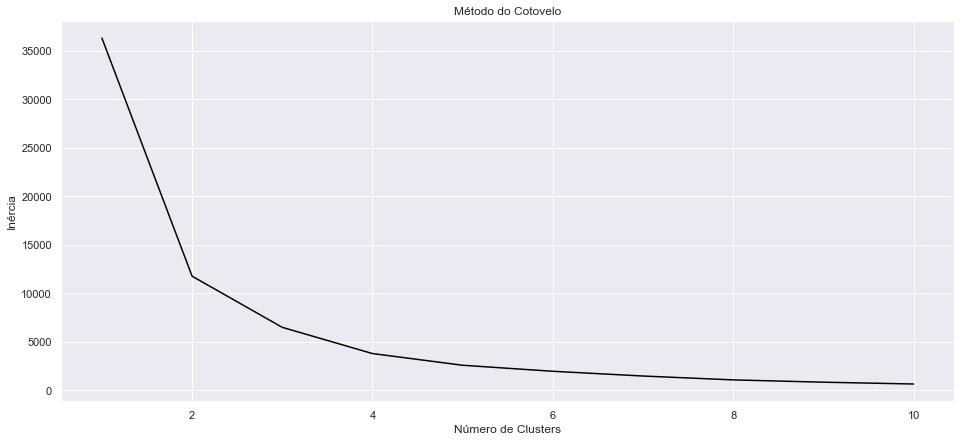

In [231]:
#Dataframe auxiliar para plotar o gráfico:
aux = df_cut.reindex(columns = ['rate', 'metascore'])

#Aplicando o método:
inercia = []

for i in range (1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(aux)
    inercia.append(kmeans.inertia_)

f, axs = plt.subplots(figsize = (16, 7))
plt.plot(range(1, 11), inercia, color = 'k')
plt.title("Método do Cotovelo")
plt.xlabel("Número de Clusters")
plt.ylabel("Inércia")
plt.show()

O valor 2 mostra ser o ponto de "cotovelo" do gráfico, assim, faremos 2 grupos:

In [215]:
#Aplicando:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10)
clusters = kmeans.fit_predict(aux)

#Dataframe com o cluster:
aux['cluster'] = clusters
df_cut['cluster'] = clusters
df_cut.head()

,year,movie,certificate,duration,genre,rate,metascore,Oscar_Best_Picture_won,tomatometer_status,tomatometer_rating,audience_status,audience_rating,duration_break,meta_break,tomatometer_break,audience_break,cluster
0,2002,Frida,R,123,Biography|Drama|Romance,7.4,61.0,No,Certified-Fresh,75.0,Upright,85.0,121 - 150,61 - 70,71 - 80,81 - 90,0
1,2001,Shrek,PG,90,Animation|Adventure|Comedy,7.9,84.0,No,Certified-Fresh,88.0,Upright,90.0,61 - 90,81 - 90,81 - 90,81 - 90,1
2,2001,Planet of the Apes,PG-13,119,Action|Adventure|Sci-Fi,5.7,50.0,No,Certified-Fresh,87.0,Upright,87.0,91 - 120,41 - 50,81 - 90,81 - 90,0
3,2002,Spider-Man,PG-13,121,Action|Adventure,7.3,73.0,No,Certified-Fresh,90.0,Upright,67.0,121 - 150,71 - 80,81 - 90,61 - 70,0
4,2001,Mulholland Drive,R,147,Drama|Mystery|Thriller,8.0,81.0,No,Certified-Fresh,83.0,Upright,87.0,121 - 150,81 - 90,81 - 90,81 - 90,1


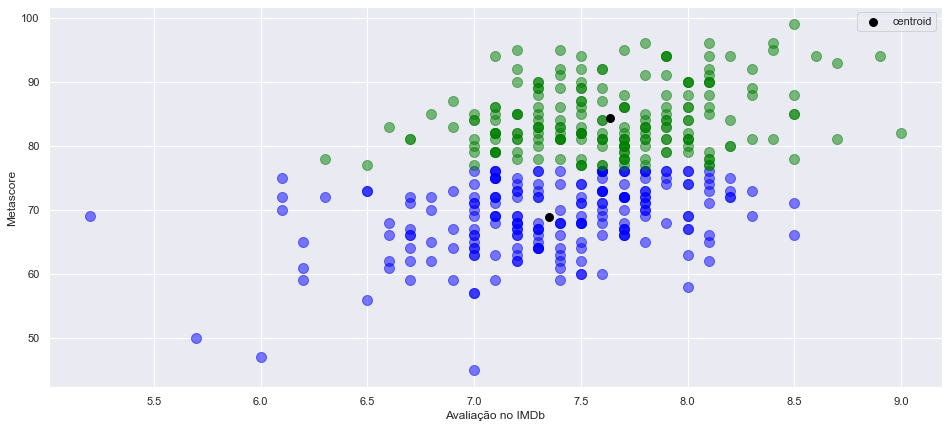

In [228]:
#Visualização:

cl_1 = df_cut[df_cut['cluster'] == 0]
cl_2 = df_cut[df_cut['cluster'] == 1]

f, axs = plt.subplots(figsize = (16, 7))

plt.scatter(cl_1[['rate']], y = cl_1[['metascore']], s = 100, c = "blue", alpha = 0.5)
plt.scatter(cl_2[['rate']], y = cl_2[['metascore']], s = 100, c = "green", alpha = 0.5)

plt.xlabel("Avaliação no IMDb")
plt.ylabel("Metascore")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 250, color = "black", marker = ".", label = "centroid")

plt.legend()

O grupo B possui notas mais favoráveis em ambos os parâmetros, então utilizaremos ele para a análise:

In [232]:
#Assumindo somente os filmes do grupo B:
df_cut = df_cut [(df_cut.cluster == 1)]
df_cut.reset_index(inplace = True, drop = False)
df_cut.drop(["index"], axis = 1, inplace = True)

print(f'Número de filmes no grupo verde: {df_cut.shape[0]}.')

Número de filmes no grupo verde: 200.


## Perfil do grupo

### Classificação Indicativa

[Text(0.5, 0, 'Certificados'), Text(0, 0.5, 'Nº de Filmes')]

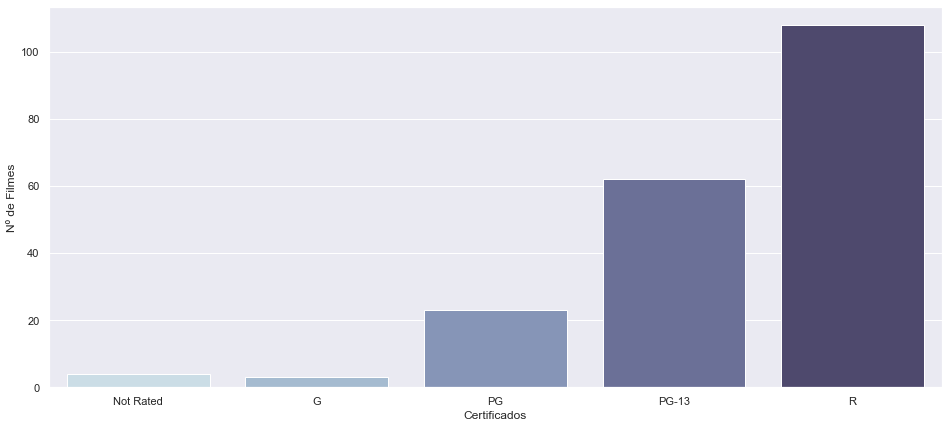

In [236]:
#Criando o dataframe:
count_cert_cut = df_cut.groupby(['certificate']).size()
count_cert_cut = count_cert_cut.reindex(index = ['Not Rated', 'G', 'PG', 'PG-13', 'R'])

#Visualização:
sns.set_theme(font_scale = 1.0, palette = 'ch:s=.25,rot=-.25')
f, axs = plt.subplots(figsize = (16, 7))
graph_cert_cut = sns.barplot(x = count_cert_cut.index, y = count_cert_cut.values)
graph_cert_cut.set(xlabel = 'Certificados', ylabel = 'Nº de Filmes')

In [237]:
count_cert_cut = count_cert_cut.sort_values(ascending = False)
pd.DataFrame(count_cert_cut, columns = ['movies'])

,movies
certificate,
R,108
PG-13,62
PG,23
Not Rated,4
G,3


### Duração

[Text(0.5, 0, 'Duração'), Text(0, 0.5, 'Nº de Filmes')]

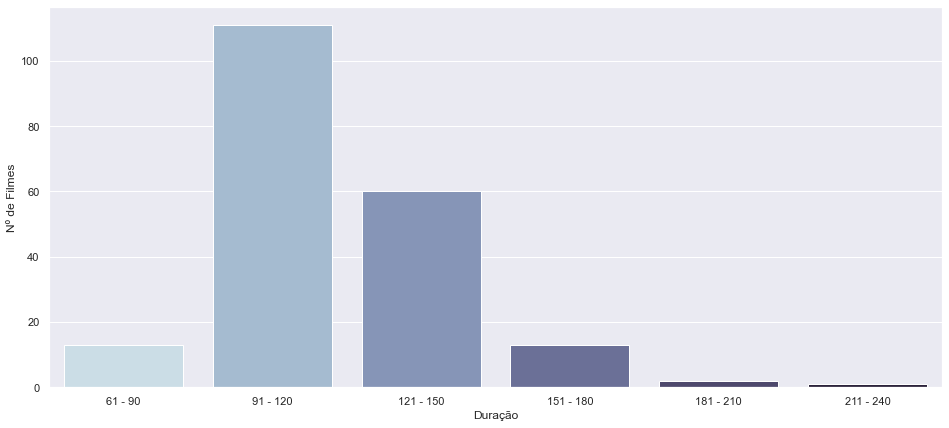

In [238]:
#Criando o dataframe:
count_dur_cut = df_cut
count_dur_cut['duration_break'] = count_dur_cut['duration'].apply(n_break, args = (1, 30, 30))
count_dur_cut = count_dur_cut.groupby(['duration_break']).size()
count_dur_cut = count_dur_cut.reindex(index = ['61 - 90', '91 - 120', '121 - 150', '151 - 180', '181 - 210', '211 - 240'])

#Visualização:
f, axs = plt.subplots(figsize = (16, 7))
graph_dur_cut = sns.barplot(x = count_dur_cut.index, y = count_dur_cut.values)
graph_dur_cut.set(xlabel = 'Duração', ylabel = 'Nº de Filmes')


In [239]:
count_dur_cut = count_dur_cut.sort_values(ascending = False)

pd.DataFrame(count_dur_cut, columns = ['movies'])

,movies
duration_break,
91 - 120,111
121 - 150,60
61 - 90,13
151 - 180,13
181 - 210,2
211 - 240,1


### Gênero

In [240]:
#Criando o dicionário:
dicio_gen_cut = {}

for i in range(len(df_cut.index)):
    dicio_gen_cut = str_count(df_cut['genre'].iloc[i], dicio_gen_cut)

count_gen_cut = pd.DataFrame(list(dicio_gen_cut.items()), columns = ['genre', 'movies'])

#Organizando e visualizando:
count_gen_cut = count_gen_cut.sort_values(['movies'], ascending = False)
count_gen_cut.reset_index(inplace = True, drop = True)
count_gen_cut

,genre,movies
0,Drama,158
1,Comedy,53
2,Adventure,44
3,Romance,31
4,Biography,27
5,Action,24
6,Animation,22
7,Thriller,21
8,Crime,19
9,Mystery,18


### Nota do Usuários - IMDb

[Text(0.5, 0, 'Notas no IMDb'), Text(0, 0.5, 'Nº de filmes')]

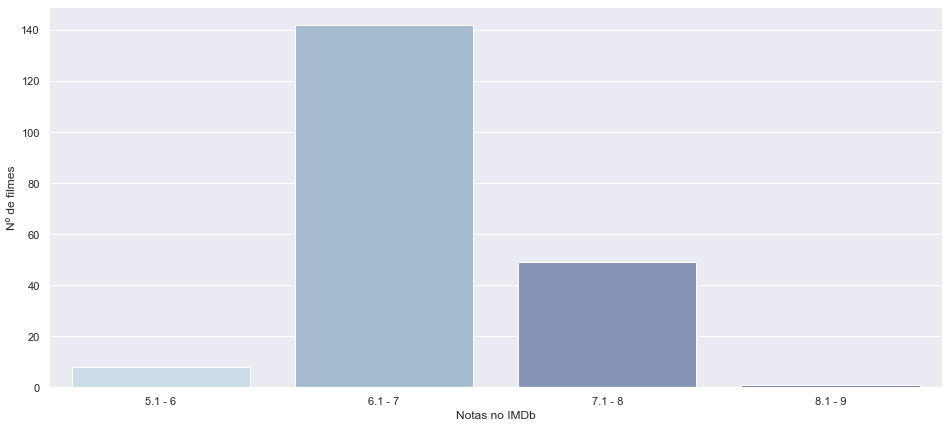

In [241]:
#Criando o dataframe:
count_rate_cut = df_cut
count_rate_cut = count_rate_cut['rate'].apply(inteirar)
count_rate_cut['rate_break'] = count_rate_cut.apply(n_break, args = (0, 1, 1, False))
count_rate_cut = count_rate_cut.groupby(['rate_break']).size()

#Visualização:
f, axs = plt.subplots(figsize = (16, 7))
graph_rate_cut = sns.barplot(x = count_rate_cut.index, y = count_rate_cut.values)
graph_rate_cut.set(xlabel = 'Notas no IMDb', ylabel = 'Nº de filmes')

In [242]:
count_rate_cut = count_rate_cut.sort_values(ascending = False)
count_rate_cut

rate
6.1 - 7    142
7.1 - 8     49
5.1 - 6      8
8.1 - 9      1
Name: rate, dtype: int64

### Metascore

[Text(0.5, 0, 'Metascore'), Text(0, 0.5, 'Nº de filmes')]

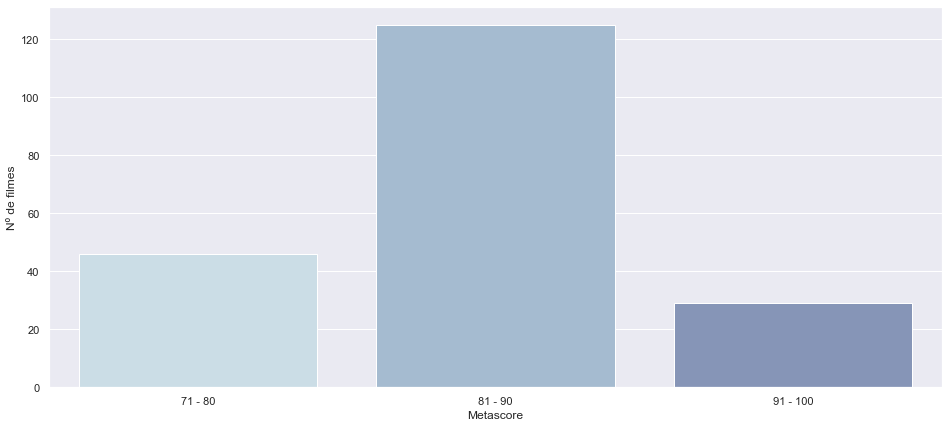

In [243]:
#Criando o dataframe:
count_meta_cut = df_cut
count_meta_cut['meta_break'] = count_meta_cut['metascore'].apply(n_break, args = (0, 10, 10))
count_meta_cut = count_meta_cut.groupby(['meta_break']).size()

#Visualização:
f, axs = plt.subplots(figsize = (16, 7))
graph_meta_cut = sns.barplot(x = count_meta_cut.index, y = count_meta_cut.values)
graph_meta_cut.set(xlabel = 'Metascore', ylabel = 'Nº de filmes')

In [244]:
count_meta_cut = count_meta_cut.sort_values(ascending = False)
pd.DataFrame(count_meta_cut, columns = ['movies'])

,movies
meta_break,
81 - 90,125
71 - 80,46
91 - 100,29


### Tomatometer

[Text(0.5, 0, 'Notas'), Text(0, 0.5, 'Nº de filmes')]

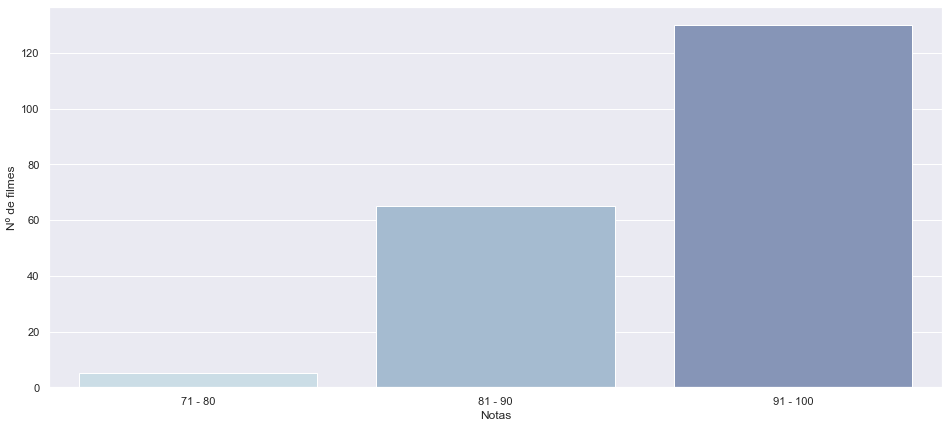

In [246]:
#Criando o dataframe:
count_tomatometer_rating_cut = df_cut
count_tomatometer_rating_cut['tomatometer_break'] = count_tomatometer_rating_cut['tomatometer_rating'].apply(n_break, args = (0, 10, 10))
count_tomatometer_rating_cut = count_tomatometer_rating_cut.groupby(['tomatometer_break']).size()

#Visualização:
f, axs = plt.subplots(figsize = (16, 7))
graph_tomatometer_rating_cut = sns.barplot(x = count_tomatometer_rating_cut.index, y = count_tomatometer_rating_cut.values)
graph_tomatometer_rating_cut.set(xlabel = 'Notas', ylabel = 'Nº de filmes')

In [247]:
count_tomatometer_rating_cut = count_tomatometer_rating_cut.sort_values(ascending = False)
pd.DataFrame(count_tomatometer_rating_cut, columns = ['movies'])

,movies
tomatometer_break,
91 - 100,130
81 - 90,65
71 - 80,5


### Nota do Usuários - RT

[Text(0.5, 0, 'Notas'), Text(0, 0.5, 'Nº de filmes')]

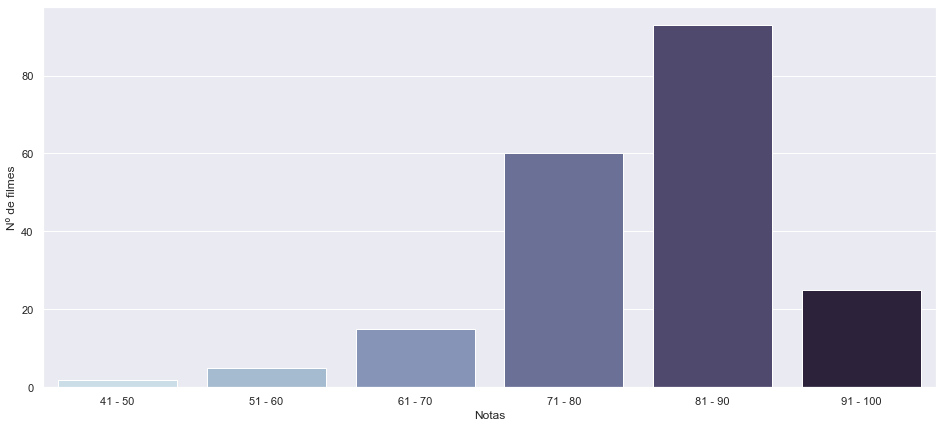

In [248]:
#Criando o dataframe:
count_audience_rating_cut = df_cut
count_audience_rating_cut['audience_break'] = count_audience_rating_cut['audience_rating'].apply(n_break, args = (0, 10, 10))
count_audience_rating_cut = count_audience_rating_cut.groupby(['audience_break']).size()

#Visualização:
f, axs = plt.subplots(figsize = (16, 7))
graph_audience_cut = sns.barplot(x = count_audience_rating_cut.index, y = count_audience_rating_cut.values)
graph_audience_cut.set(xlabel = 'Notas', ylabel = 'Nº de filmes')

In [249]:
count_audience_rating_cut = count_audience_rating_cut.sort_values(ascending = False)
pd.DataFrame(count_audience_rating_cut, columns = ['movies'])

,movies
audience_break,
81 - 90,93
71 - 80,60
91 - 100,25
61 - 70,15
51 - 60,5
41 - 50,2


### Comparação de Resultados

In [277]:
dicio_cut = {'R': [108], 'Dur: 91 - 120': [111], 'Drama': [158], 'IMDb: 6.1 - 7': [142], 'Meta: 81 - 90': [125],
'Certified-Fresh': ['-'], 'Tomatometer: 91 - 100': [130], 'Upright': ['-'], 'Aud_RT: 81 - 90': [93]}

result_cut = pd.DataFrame(data = dicio_cut)
result_cut

,R,Dur: 91 - 120,Drama,IMDb: 6.1 - 7,Meta: 81 - 90,Certified-Fresh,Tomatometer: 91 - 100,Upright,Aud_RT: 81 - 90
0,108,111,158,142,125,-,130,-,93


In [278]:
n_lin_cut = df_cut.shape[0]

dicio_percen_cut = {'R': [percen_df(108, n_lin_cut)], 'Dur: 91 - 120': [percen_df(111, n_lin_cut)], 'Drama': [percen_df(158, n_lin_cut)], 'IMDb: 6.1 - 7': [percen_df(142, n_lin_cut)], 'Meta: 81 - 90': [percen_df(125, n_lin_cut)],
'Certified-Fresh': ['-'], 'Tomatometer: 91 - 100': [percen_df(130, n_lin_cut)], 'Upright': ['-'], 'Aud_RT: 81 - 90': [percen_df(93, n_lin_cut)]}

result_percen_cut = pd.DataFrame(data = dicio_percen_cut)
result_percen_cut

,R,Dur: 91 - 120,Drama,IMDb: 6.1 - 7,Meta: 81 - 90,Certified-Fresh,Tomatometer: 91 - 100,Upright,Aud_RT: 81 - 90
0,54.00%,55.50%,79.00%,71.00%,62.50%,-,65.00%,-,46.50%


# Qual o melhor parâmetro, entre os estudados, para determinar as chances de vitória de um filme na categoria de Melhor Filme (Best Picture)?

Para este objetivo, iremos filtrar os vencedores da categoria contidos no dataframe e analisá-los sobre os parâmetros avaliativos para determinar:
* Qual parâmetro deu a maior nota a cada vencedor? Utilizaremos um ranking para contabilizar todos os vencedores;
* Qual a média dos vencedores em cada parâmetro?

In [179]:
#Pegando os vencedores da categoria no dataframe:

df_cut = df_final [(df_final.Oscar_Best_Picture_won == 'Yes')]
df_cut.reset_index(inplace = True, drop = True)
df_cut.head()

,year,movie,certificate,duration,genre,rate,metascore,Oscar_Best_Picture_won,tomatometer_status,tomatometer_rating,audience_status,audience_rating,duration_break,meta_break,tomatometer_break,audience_break
0,2003,The Lord of the Rings: The Return of the King,PG-13,201,Adventure|Drama|Fantasy,8.9,94.0,Yes,Certified-Fresh,93.0,Upright,86.0,181 - 210,91 - 100,91 - 100,81 - 90
1,2001,A Beautiful Mind,PG-13,135,Biography|Drama,8.2,72.0,Yes,Certified-Fresh,74.0,Upright,93.0,121 - 150,71 - 80,71 - 80,91 - 100
2,2002,Chicago,PG-13,113,Comedy|Crime|Musical,7.2,82.0,Yes,Certified-Fresh,86.0,Upright,83.0,91 - 120,81 - 90,81 - 90,81 - 90
3,2004,Crash,R,112,Crime|Drama|Thriller,7.8,69.0,Yes,Certified-Fresh,74.0,Upright,88.0,91 - 120,61 - 70,71 - 80,81 - 90
4,2004,Million Dollar Baby,PG-13,132,Drama|Sport,8.1,86.0,Yes,Certified-Fresh,91.0,Upright,90.0,121 - 150,81 - 90,91 - 100,81 - 90


In [180]:
def zero_a_cem (a):
    return round(a * 10, 1)

def compare (a, b, c, d):
    if (a > b and a > c and a > d):
        return 'Tomatometer'
    elif (b > a and b > c and b > d):
        return 'Audience Rating - RT'
    elif (c > a and c > b and c > d):
        return 'Metascore'
    elif (d > a and d > b and d > c):
        return 'IMDb Rate'
    else:
        return 'Draw'

df_cut['rate'] = df_cut['rate'].apply(zero_a_cem)
df_cut['indicator'] = df_cut.apply(lambda x: compare(x["tomatometer_rating"], x["audience_rating"], x['metascore'], x['rate']), axis = 1)
df_cut


,year,movie,certificate,duration,genre,rate,metascore,Oscar_Best_Picture_won,tomatometer_status,tomatometer_rating,audience_status,audience_rating,duration_break,meta_break,tomatometer_break,audience_break,indicator
0,2003,The Lord of the Rings: The Return of the King,PG-13,201,Adventure|Drama|Fantasy,89.0,94.0,Yes,Certified-Fresh,93.0,Upright,86.0,181 - 210,91 - 100,91 - 100,81 - 90,Metascore
1,2001,A Beautiful Mind,PG-13,135,Biography|Drama,82.0,72.0,Yes,Certified-Fresh,74.0,Upright,93.0,121 - 150,71 - 80,71 - 80,91 - 100,Audience Rating - RT
2,2002,Chicago,PG-13,113,Comedy|Crime|Musical,72.0,82.0,Yes,Certified-Fresh,86.0,Upright,83.0,91 - 120,81 - 90,81 - 90,81 - 90,Tomatometer
3,2004,Crash,R,112,Crime|Drama|Thriller,78.0,69.0,Yes,Certified-Fresh,74.0,Upright,88.0,91 - 120,61 - 70,71 - 80,81 - 90,Audience Rating - RT
4,2004,Million Dollar Baby,PG-13,132,Drama|Sport,81.0,86.0,Yes,Certified-Fresh,91.0,Upright,90.0,121 - 150,81 - 90,91 - 100,81 - 90,Tomatometer
5,2006,The Departed,R,151,Crime|Drama|Thriller,85.0,85.0,Yes,Certified-Fresh,91.0,Upright,94.0,151 - 180,81 - 90,91 - 100,91 - 100,Audience Rating - RT
6,2007,No Country for Old Men,R,122,Crime|Drama|Thriller,81.0,91.0,Yes,Certified-Fresh,93.0,Upright,86.0,121 - 150,91 - 100,91 - 100,81 - 90,Tomatometer
7,2008,The Hurt Locker,R,131,Drama|History|Thriller,76.0,94.0,Yes,Certified-Fresh,97.0,Upright,84.0,121 - 150,91 - 100,91 - 100,81 - 90,Tomatometer
8,2008,Slumdog Millionaire,R,120,Drama,80.0,86.0,Yes,Certified-Fresh,91.0,Upright,90.0,91 - 120,81 - 90,91 - 100,81 - 90,Tomatometer
9,2012,Argo,R,120,Biography|Drama|History,77.0,86.0,Yes,Certified-Fresh,96.0,Upright,90.0,91 - 120,81 - 90,91 - 100,81 - 90,Tomatometer


Agrupando e criando o ranking:

In [181]:
indicator_count = df_cut.groupby(['indicator']).size()
indicator_count = indicator_count.sort_values(ascending = False)

pd.DataFrame(indicator_count, columns = ['movies'])

,movies
indicator,
Tomatometer,9
Metascore,4
Audience Rating - RT,3


Comparando com as médias:

In [267]:
tomatometer_mean = df_cut[['tomatometer_rating']].mean()
audience_mean = df_cut[['audience_rating']].mean()
metascore_mean = df_cut[['metascore']].mean()
imdb_mean = df_cut[['rate']].mean()

data = [[f'{float(tomatometer_mean):.2f}', f'{float(audience_mean):.2f}', f'{float(metascore_mean):.2f}', f'{float(imdb_mean):.2f}']]

pd.DataFrame(data = data, columns = ['Tomatometer', 'User Score - RT', 'Metascore', 'User Score - IMDb'])



,Tomatometer,User Score - RT,Metascore,User Score - IMDb
0,91.31,81.19,84.33,7.64


# Conclusão

## Resultados

### Quais as características mais frequentes entre os filmes indicados à premiação?

Encontramos que as características mais predominantes nos filmes nomeados são as seguintes:

In [279]:
result

,PG-13,Dur: 91 - 120 min,Drama,IMDb: 6.1 - 7,Meta: 61 - 70,Certified-Fresh,Tomatometer: 81 - 90,Upright,Aud_RT: 81 - 90
0,459,595,599,529,214,536,230,801,284


In [280]:
result_percen

,PG-13,Dur: 91 - 120 min,Drama,IMDb: 6.1 - 7,Meta: 61 - 70,Certified-Fresh,Tomatometer: 81 - 90,Upright,Aud_RT: 81 - 90
0,43.22%,56.03%,56.40%,49.81%,20.15%,50.47%,21.66%,75.42%,26.74%


Quanto às categorias:
* Na classificação indicativa, a R ficou muito próxima da mais predominante PG-13. Observamos num geral que, quanto maior a classificação, maior o número de indicados;
* Duração, gênero, status do Tomatometer e status da avaliação dos usuários no Rotten Tomatoes: houve uma grande predominância do que mais apareceu;
* Quanto às notas: as notas do IMDb e do Metacritic acabaram abaixo do esperado, visto que estão pouco acima da média; as do Rotten Tomatoes estão dentro do que se esperava.

### Dentre os indicados, qual o perfil dos filmes que foram melhor aceitos pelo público e pela crítica?

No grupo analisado, encontramos que se predominava:

In [281]:
result_cut

,R,Dur: 91 - 120,Drama,IMDb: 6.1 - 7,Meta: 81 - 90,Certified-Fresh,Tomatometer: 91 - 100,Upright,Aud_RT: 81 - 90
0,108,111,158,142,125,-,130,-,93


In [282]:
result_percen_cut

,R,Dur: 91 - 120,Drama,IMDb: 6.1 - 7,Meta: 81 - 90,Certified-Fresh,Tomatometer: 91 - 100,Upright,Aud_RT: 81 - 90
0,54.00%,55.50%,79.00%,71.00%,62.50%,-,65.00%,-,46.50%


Comparando com os resultados da primeira pergunta, houveram algumas mudanças, mas não muito discrepantes:
* A mudança na classificação indicativa não surpreendeu, pois "R", mesmo no dataset original, estava muito próximo de "PG-13";
* O gênero "Drama" ficou muito mais predominante, indicando que filmes desse gênero tendem a ser mais aceitos em todos os parâmetros;
* As notas aumentaram, contundo, isso já era previsto deste a criação do segundo dataframe, pois selecionamos os mais bem avaliados; ainda assim, é interessante destacar como a nota pouco acima da média do IMDb ficou ainda mais predominante, visto que o esperado era de que ela aumentasse ou, ao menos, sua predominância, como visto nas outras. 

### Qual o melhor parâmetro, entre os estudados, para determinar as chances de vitória de um filme na categoria de Melhor Filme (Best Picture)?

O Tomatometer ficou, com folga, na frente dos demais parâmetros, indicando que os críticos do site Rotten Tomatoes têm ideias mais alinhadas com as da academia.
O IMDb acabou bem distante de todos os outros parâmetros, sendo assim, os usuários do site são, não apenas os que têm as opiniões mais diversas, mas também os que mais se distanciam das ideias da academia. 

## Importância

Por ser um grande cículo midiático, ter um melhor indicativo de quais os filmes que podem ser esperados nas indicações e nas vitórias é um meio de ganhar credibilidade como formador de opinião, sendo útil haver mecanismos de previsões para jornais ou influenciadores.

## Limitações

* Não cobrimos todas as edições deste século;
* Alguns dados foram perdidos pela incompatibilidade dos datasets utilizados.

## Trabalhos Futuros e Melhorias

Para trabalhos futuros, gostaríamos de recomendar uma exploração quanto:
* Às categorias: abrangindo cada categoria da academia e estudando cada caso;
* Ao tempo: estudando como o perfil dos indicados e vencedores foi sendo modificado ao longo do tempo.